In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train.drop(['Loan_ID'], axis=1, inplace=True)
test.drop(['Loan_ID'], axis=1, inplace=True)

In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
Y = train['Loan_Status']
train.drop(['Loan_Status'], axis=True, inplace=True)

In [ ]:
col = train.columns

In [ ]:
for i in range(len(train.columns)):
  print(train[train.columns[i]].dtype, len(train[train.columns[i]].value_counts()))
print('=================================')
for i in range(len(test.columns)):
  print(test[test.columns[i]].dtype, len(test[test.columns[i]].value_counts()))

object 2
object 2
object 4
object 2
object 2
int64 505
float64 287
float64 203
float64 10
float64 2
object 3
object 2
object 2
object 4
object 2
object 2
int64 314
int64 194
float64 144
float64 12
float64 2
object 3


In [ ]:
print('Null values in train \n',train.isnull().sum())
print('===========================================')
print('Null values in test \n',test.isnull().sum())

Null values in train 
 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64
Null values in test 
 Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


We Do not need to drop any column

In [ ]:
def filler(df1, df2, col):
  if len(df1[col].value_counts()) > 50:
    df1[col].fillna(value=df1[col].mean(), inplace=True)
    df2[col].fillna(value=df1[col].mean(), inplace=True)
  else:
    df1[col].fillna(value=scipy.stats.mode(df1[col])[0][0], inplace=True)
    df2[col].fillna(value=scipy.stats.mode(df1[col])[0][0], inplace=True)
        
  return df1[col], df2[col]

def fillnans(df1, df2):
  col = df1.columns
  for i in range(len(col)):
    if any(df1[col[i]].isnull()) or any(df2[col[i]].isnull()) == True:
      df1[col[i]], df2[col[i]] = filler(df1, df2,col[i])
  return df1, df2

In [ ]:
train, test = fillnans(train, test)

In [ ]:
print(train.isnull().sum())
print('=========================')
print(test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

def Encoding(df1, df2):
  col = df1.columns
  for i in range(len(col)):
    if df1[col[i]].dtype == 'object':
      print(col[i])
      df1[col[i]], df2[col[i]] = ApplyEncoding(df1, df2, col[i])
  return df1, df2

def ApplyEncoding(df1, df2, col):
  le = LabelEncoder()
  df1[col] = le.fit_transform(df1[col])
  df2[col] = le.transform(df2[col])
  return df1[col], df2[col]

In [ ]:
train, test = Encoding(train, test)

Gender
Married
Dependents
Education
Self_Employed
Property_Area


In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train = ss.fit_transform(train)
test = ss.transform(test)

In [ ]:
new_train = pd.DataFrame(train, columns=col)
new_test = pd.DataFrame(test, columns=col)

In [ ]:
new_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.273231,0.411733,1.223298


In [ ]:
train = pd.concat([new_train, Y], axis=1)
test = new_test

In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.273231,0.411733,1.223298,Y
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.273231,0.411733,-1.318513,N
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.273231,0.411733,1.223298,Y
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.273231,0.411733,1.223298,Y
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.273231,0.411733,1.223298,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.273231,0.411733,-1.318513,Y
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.522836,0.411733,-1.318513,Y
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.273231,0.411733,1.223298,Y
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.273231,0.411733,1.223298,Y


In [ ]:
le = LabelEncoder()
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])

In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.273231,0.411733,1.223298,1
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.273231,0.411733,-1.318513,0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.273231,0.411733,1.223298,1
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.273231,0.411733,1.223298,1
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.273231,0.411733,1.223298,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.273231,0.411733,-1.318513,1
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.522836,0.411733,-1.318513,1
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.273231,0.411733,1.223298,1
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.273231,0.411733,1.223298,1


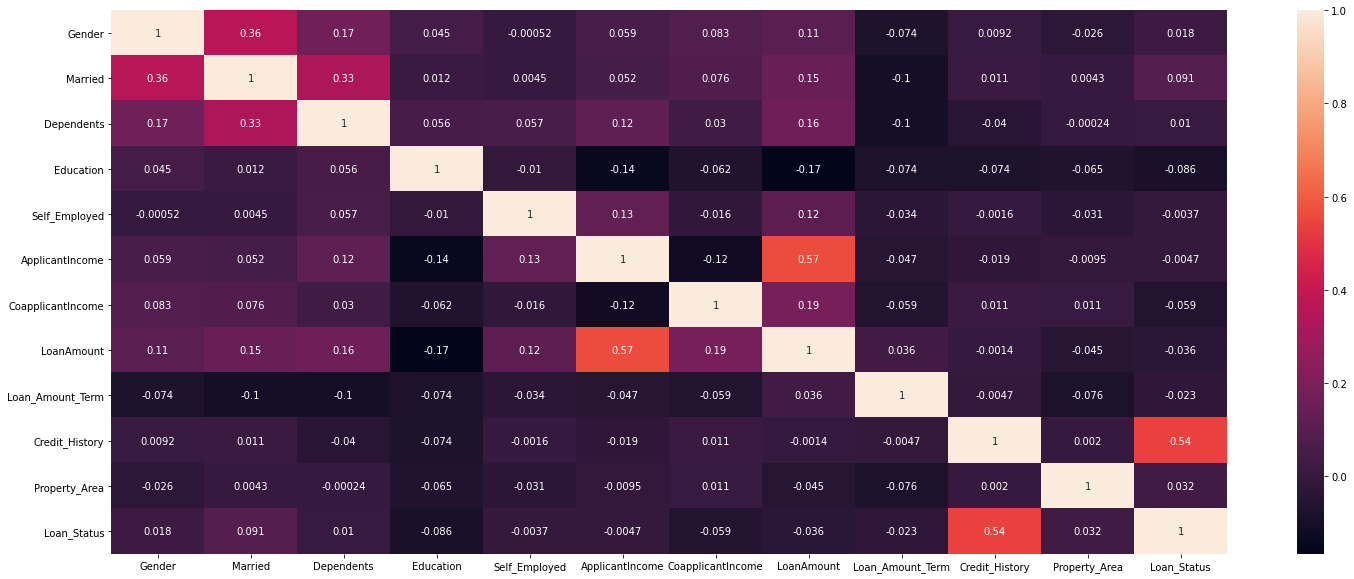

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(train.corr(), ax=ax, annot=True)

In [ ]:
x = train.drop(['Loan_Status'], axis=1)
y = train['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
lr = LogisticRegression()
lr.fit(train_x, train_y)
pred_lr = lr.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_lr))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_lr))
print('f1_score => ',f1_score(test_y, pred_lr))
print('Classification_Report => \n',classification_report(test_y, pred_lr))
print('===================================================================')

accuracy_score =>  0.8617886178861789
confusion_matrix => 
 [[22 16]
 [ 1 84]]
f1_score =>  0.9081081081081082
Classification_Report => 
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_x, train_y)
pred_knn = knn.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_knn))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_knn))
print('f1_score => ',f1_score(test_y, pred_knn))
print('Classification_Report => \n',classification_report(test_y, pred_knn))
print('===================================================================')

accuracy_score =>  0.8455284552845529
confusion_matrix => 
 [[21 17]
 [ 2 83]]
f1_score =>  0.8972972972972972
Classification_Report => 
               precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [ ]:
knn = KNeighborsClassifier(n_neighbors=51)
knn.fit(train_x, train_y)
pred_knn = knn.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_knn))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_knn))
print('f1_score => ',f1_score(test_y, pred_knn))
print('Classification_Report => \n',classification_report(test_y, pred_knn))
print('===================================================================')

accuracy_score =>  0.8130081300813008
confusion_matrix => 
 [[16 22]
 [ 1 84]]
f1_score =>  0.8795811518324608
Classification_Report => 
               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



In [ ]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(train_x, train_y)
pred_dtc = dtc.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_dtc))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_dtc))
print('f1_score => ',f1_score(test_y, pred_dtc))
print('Classification_Report => \n',classification_report(test_y, pred_dtc))
print('===================================================================')

accuracy_score =>  0.6991869918699187
confusion_matrix => 
 [[22 16]
 [21 64]]
f1_score =>  0.7757575757575759
Classification_Report => 
               precision    recall  f1-score   support

           0       0.51      0.58      0.54        38
           1       0.80      0.75      0.78        85

    accuracy                           0.70       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.71      0.70      0.70       123



In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x, train_y)
pred_dtc = dtc.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_dtc))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_dtc))
print('f1_score => ',f1_score(test_y, pred_dtc))
print('Classification_Report => \n',classification_report(test_y, pred_dtc))
print('===================================================================')

accuracy_score =>  0.7235772357723578
confusion_matrix => 
 [[23 15]
 [19 66]]
f1_score =>  0.7951807228915663
Classification_Report => 
               precision    recall  f1-score   support

           0       0.55      0.61      0.57        38
           1       0.81      0.78      0.80        85

    accuracy                           0.72       123
   macro avg       0.68      0.69      0.69       123
weighted avg       0.73      0.72      0.73       123



In [ ]:
nb = GaussianNB()
nb.fit(train_x, train_y)
pred_nb = nb.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_nb))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_nb))
print('f1_score => ',f1_score(test_y, pred_nb))
print('Classification_Report => \n',classification_report(test_y, pred_nb))
print('===================================================================')

accuracy_score =>  0.8455284552845529
confusion_matrix => 
 [[22 16]
 [ 3 82]]
f1_score =>  0.8961748633879782
Classification_Report => 
               precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123



In [ ]:
svc = SVC()
svc.fit(train_x, train_y)
pred_svc = svc.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_svc))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_svc))
print('f1_score => ',f1_score(test_y, pred_svc))
print('Classification_Report => \n',classification_report(test_y, pred_svc))
print('===================================================================')

accuracy_score =>  0.8536585365853658
confusion_matrix => 
 [[21 17]
 [ 1 84]]
f1_score =>  0.903225806451613
Classification_Report => 
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [ ]:
svc = SVC(kernel='poly')
svc.fit(train_x, train_y)
pred_svc = svc.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_svc))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_svc))
print('f1_score => ',f1_score(test_y, pred_svc))
print('Classification_Report => \n',classification_report(test_y, pred_svc))
print('===================================================================')

accuracy_score =>  0.8617886178861789
confusion_matrix => 
 [[22 16]
 [ 1 84]]
f1_score =>  0.9081081081081082
Classification_Report => 
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [ ]:
svc = SVC(kernel='sigmoid')
svc.fit(train_x, train_y)
pred_svc = svc.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_svc))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_svc))
print('f1_score => ',f1_score(test_y, pred_svc))
print('Classification_Report => \n',classification_report(test_y, pred_svc))
print('===================================================================')

accuracy_score =>  0.8292682926829268
confusion_matrix => 
 [[20 18]
 [ 3 82]]
f1_score =>  0.8864864864864864
Classification_Report => 
               precision    recall  f1-score   support

           0       0.87      0.53      0.66        38
           1       0.82      0.96      0.89        85

    accuracy                           0.83       123
   macro avg       0.84      0.75      0.77       123
weighted avg       0.84      0.83      0.82       123



In [ ]:
svc = SVC(degree=5)
svc.fit(train_x, train_y)
pred_svc = svc.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_svc))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_svc))
print('f1_score => ',f1_score(test_y, pred_svc))
print('Classification_Report => \n',classification_report(test_y, pred_svc))
print('===================================================================')

accuracy_score =>  0.8536585365853658
confusion_matrix => 
 [[21 17]
 [ 1 84]]
f1_score =>  0.903225806451613
Classification_Report => 
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [ ]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini')
rfc.fit(train_x, train_y)
pred_rfc = rfc.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_rfc))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_rfc))
print('f1_score => ',f1_score(test_y, pred_rfc))
print('Classification_Report => \n',classification_report(test_y, pred_rfc))
print('===================================================================')

accuracy_score =>  0.8536585365853658
confusion_matrix => 
 [[25 13]
 [ 5 80]]
f1_score =>  0.898876404494382
Classification_Report => 
               precision    recall  f1-score   support

           0       0.83      0.66      0.74        38
           1       0.86      0.94      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.80      0.82       123
weighted avg       0.85      0.85      0.85       123



In [ ]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(train_x, train_y)
pred_rfc = rfc.predict(test_x)
print('===================================================================')
print('accuracy_score => ',accuracy_score(test_y, pred_rfc))
print('confusion_matrix => \n',confusion_matrix(test_y, pred_rfc))
print('f1_score => ',f1_score(test_y, pred_rfc))
print('Classification_Report => \n',classification_report(test_y, pred_rfc))
print('===================================================================')

accuracy_score =>  0.8292682926829268
confusion_matrix => 
 [[22 16]
 [ 5 80]]
f1_score =>  0.8839779005524863
Classification_Report => 
               precision    recall  f1-score   support

           0       0.81      0.58      0.68        38
           1       0.83      0.94      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.76      0.78       123
weighted avg       0.83      0.83      0.82       123



In [ ]:
final_predictions = svc.predict(test)
final_predictions = pd.Series(final_predictions)

In [ ]:
final_predictions[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    1
dtype: int64

In [ ]:
test = pd.concat([test, final_predictions], axis=1)

In [ ]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0
0,0.472343,0.728816,-0.737806,-0.528362,-0.392601,0.051857,-0.554487,-0.433638,0.273231,0.411733,1.223298,1
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.381297,-0.041468,-0.243092,0.273231,0.411733,1.223298,1
2,0.472343,0.728816,1.244745,-0.528362,-0.392601,-0.066097,0.061136,0.733459,0.273231,0.411733,1.223298,1
3,0.472343,0.728816,1.244745,-0.528362,-0.392601,-0.501872,0.316278,-0.552730,0.273231,0.411733,1.223298,1
4,0.472343,-1.372089,-0.737806,1.892641,-0.392601,-0.348532,-0.554487,-0.814731,0.273231,0.411733,1.223298,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.472343,0.728816,2.236021,1.892641,2.547117,-0.228448,0.053270,-0.397911,0.273231,0.411733,1.223298,1
363,0.472343,0.728816,-0.737806,-0.528362,-0.392601,-0.204038,-0.312000,-0.374092,0.273231,0.411733,1.223298,1
364,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,-0.352791,0.127145,-0.243092,0.273231,0.411733,-0.047607,1
365,0.472343,0.728816,-0.737806,-0.528362,-0.392601,-0.066097,0.263950,0.138001,0.273231,0.411733,-1.318513,1
